# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [3]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [4]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
print(data.isna().sum())
print("Доля пропусков равна: {:.2f}%".format(data['days_employed'].isna().sum() / data.shape[0]*100))

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64
Доля пропусков равна: 10.10%


**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [61]:
data['days_employed'] = data['days_employed'].abs()

Возможной причиной такого рода ошибок может быть человеческий фактор.

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [62]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [63]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [64]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [65]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [66]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [67]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [68]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [69]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [70]:
data.duplicated().sum()

71

In [71]:
data = data.drop_duplicates()

Для удаления всех дубликатов необходимо использовать встроенные функции (duplicated(), drop_duplicates(), удаление вручную). Дубликаты могут появляться вследствие технических ошибок.

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [72]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [73]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [74]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [75]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [76]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

   debt_sum  debt_count         %
0    1063.0     14091.0  7.543822
1     444.0      4808.0  9.234609
2     194.0      2052.0  9.454191
3      27.0       330.0  8.181818
4       4.0        41.0  9.756098
5       0.0         9.0  0.000000


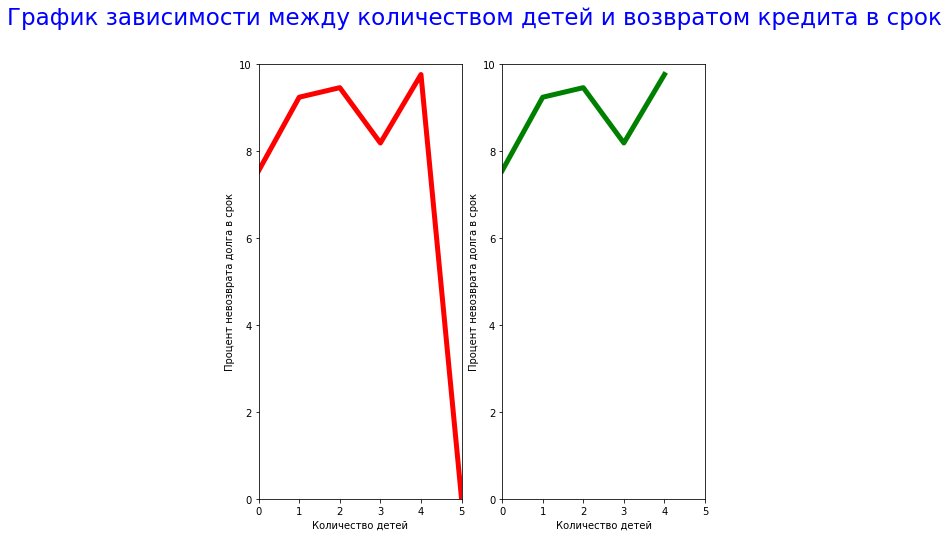

In [77]:
import matplotlib.pyplot as plt

df = pd.DataFrame([list(data.groupby('children')['debt'].sum()), list(data.groupby("children")
                    ['debt'].count()), data.groupby('children')['debt'].sum() / data.groupby("children")['debt'].count() *100],
                  index=["debt_sum", 'debt_count','%']).transpose()
#data_pivot = data.pivot_table(index=['children'], values = ['debt'], aggfunc=['sum', 'count'])
#data_pivot['%'] = data_pivot['sum'] /data_pivot['count'] * 100
#print(data_pivot)
fig, axis = plt.subplots(nrows= 1 , ncols=2, figsize=(8, 8))
axis[0].plot(df['%'], linewidth=5, color="r")
axis[0].set(xlim=[0, 5], ylim=[0, 10], xlabel = "Количество детей", ylabel = "Процент невозврата долга в срок")
axis[1].plot(df['%'][0:5], linewidth=5, color="g") 
axis[1].set(xlim=[0, 5], ylim=[0, 10], xlabel = "Количество детей", ylabel = "Процент невозврата долга в срок")
fig. suptitle("График зависимости между количеством детей и возвратом кредита в срок", fontsize=23, color="blue")
print(df)


**Вывод:** 
Исходя из представленных данных, можно сделать вывод о том, что меньше всего проблем с возвратом кредита возникает у людей, которые не имеют детей. Если исключить из анализа людей с пятью детьми (в связи со слишком малой выборкой (9 человек)), то прослеживается положительный тренд, значит, можно сделать вывод, что зависимость между количеством детей и возвратом кредита в срок присутствует, однако она слабовыраженная, т.к. на возврат кредита влияет множетсво других факторов.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

                         count    sum         %
family_status                                  
Не женат / не замужем   2796.0  273.0  9.763948
в разводе               1189.0   84.0  7.064760
вдовец / вдова           951.0   63.0  6.624606
гражданский брак        4134.0  385.0  9.313014
женат / замужем        12261.0  927.0  7.560558


Text(0, 0.5, 'Процент невозврата кредита')

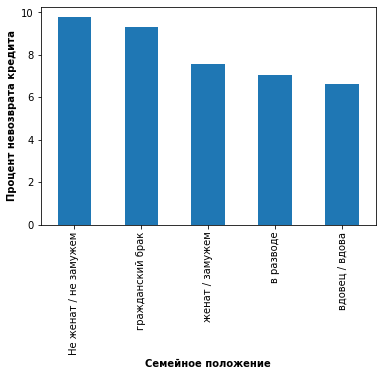

In [30]:
df = pd.DataFrame(data =[data.groupby('family_status')['debt'].count(), 
                        data.groupby('family_status')['debt'].sum(), 
                        (data.groupby('family_status')['debt'].sum()/data.groupby('family_status')['debt'].count() * 100)], 
                 index = ['count', 'sum', '%']).transpose()
print(df)
#data_pivot = data.pivot_table(index=['family_status'], values = ['debt'], aggfunc=['sum', 'count'])
#data_pivot['%'] = data_pivot['sum'] /data_pivot['count'] * 100
#print(data_pivot)

df['%'].sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Семейное положение', fontsize=10, fontweight='bold')
plt.ylabel('Процент невозврата кредита', fontsize=10, fontweight='bold')

**Вывод:** Исходя из представленных данных, можно сделать вывод о том, что между семеным положением и возвратом кредита срок существует некоторая взаимосвязь. Пока человек ответственен только за себя, он довольно халатно относится в погашению долгов, в связи с чем показатель невозврата в этой группе самый высокий. Если же пара официально зарегестрирована в браке, процент неуплаты резко снижается. Это можно объяснить как повышенной ответственностью, так и меньшей финансовой нагрузкой на одного человека. Самый низкий процент невозврата в этой выборке принадлежит вдовам/вдовцам, вполне вероятно, это связано с имуществом, которое им досталось по наследству.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

                         count     sum         %
total_income_category                           
A                         25.0     2.0  8.000000
B                       5014.0   354.0  7.060231
C                      15921.0  1353.0  8.498210
D                        349.0    21.0  6.017192
E                         22.0     2.0  9.090909


Text(0.5, 0.98, 'График зависимости между уровнем дохода и возвратом кредита в срок')

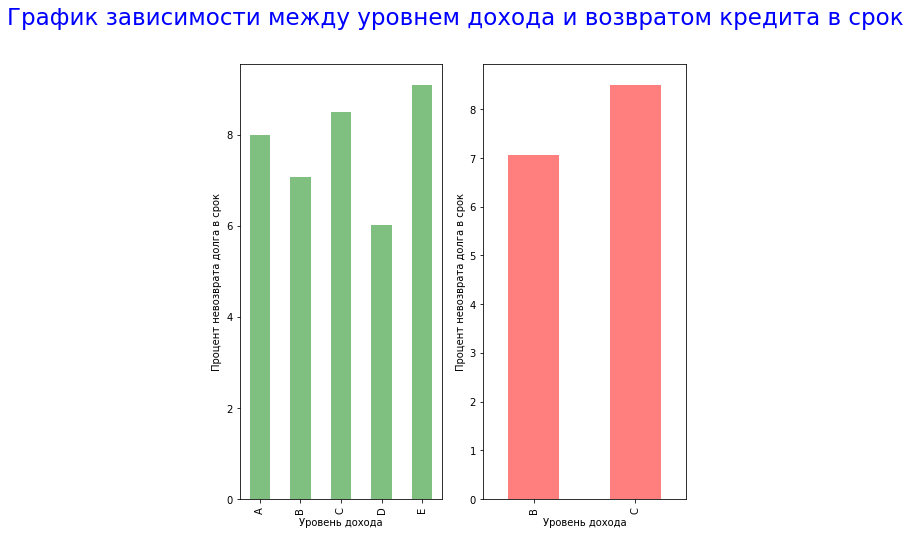

In [52]:
df = pd.DataFrame(data =[data.groupby('total_income_category')['debt'].count(), 
                        data.groupby('total_income_category')['debt'].sum(), 
                        (data.groupby('total_income_category')['debt'].sum()/data.groupby('total_income_category')['debt'].count() * 100)], 
                 index = ['count', 'sum', '%']).transpose()
print(df)
#data_pivot = data.pivot_table(index=['total_income_category'], values = ['debt'], aggfunc=['sum', 'count'])
#data_pivot['%'] = data_pivot['sum'] /data_pivot['count'] * 100
#print(data_pivot)

fig, axis = plt.subplots(nrows= 1 , ncols=2, figsize=(8, 8))
df['%'].plot.bar(ax = axis[0], color="g", alpha = 0.5)
df['%'][1:3].plot.bar(ax = axis[1], color="r", alpha = 0.5)
axis[0].set(xlabel = "Уровень дохода", ylabel = "Процент невозврата долга в срок")
axis[1].set(xlabel = "Уровень дохода", ylabel = "Процент невозврата долга в срок")
fig. suptitle("График зависимости между уровнем дохода и возвратом кредита в срок", fontsize=23, color="blue")

~~**Вывод:** Исходя из представленных данных, можно сделать вывод о том, что зависимость между уровнем дохода и возвратом кредита в срок отсутствует. Самый высокий показатель невозврата кредитов в срок у группы E с самым низким уровнем дохода, однако самый низкий показатель у группы D, которая наиболее близка к E. У группы A с самым высоким уровнем дохода средний показатель. Необходимо заметить, что этот результат не поддается логике, возможно, в данных присутствуют ошибки, крайне желательно провести более детальный анализ данного явления.~~ 

**Новый вывод:** Исходя из представленных данных, *на первый взгляд*, можно сделать вывод о том, что зависимость между уровнем дохода и возвратом кредита в срок отсутствует, т.к. самый высокий показатель невозврата кредитов в срок у группы E с самым низким уровнем дохода, однако самый низкий показатель у группы D, которая наиболее близка к E. У группы A с самым высоким уровнем дохода средний показатель. Но, если убрать из анализа группы с доходом A, D, E (в связи с несбалансированной выборкой), то мы получим вполне логичную картину: заемщики из группы B, имеют меньше проблем с возвратом кредита, чем, группа С, с более низкими доходами. Значит зависимость присутствует.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

                            count    sum         %
purpose_category                                  
операции с автомобилем     4279.0  400.0  9.347978
операции с недвижимостью  10751.0  780.0  7.255139
получение образования      3988.0  369.0  9.252758
проведение свадьбы         2313.0  183.0  7.911803


Text(0, 0.5, 'Процент невозврата кредита')

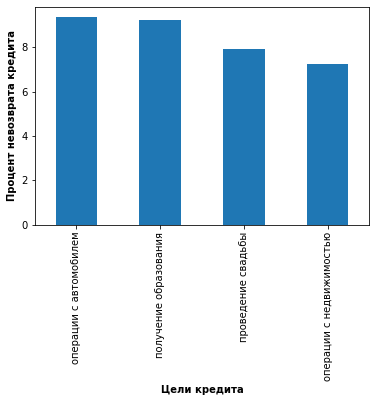

In [25]:
df = pd.DataFrame(data =[data.groupby('purpose_category')['debt'].count(), 
                        data.groupby('purpose_category')['debt'].sum(), 
                        (data.groupby('purpose_category')['debt'].sum()/data.groupby('purpose_category')['debt'].count() * 100)], 
                 index = ['count', 'sum', '%']).transpose()
print(df)

df['%'].sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Цели кредита', fontsize=10, fontweight='bold')
plt.ylabel('Процент невозврата кредита', fontsize=10, fontweight='bold')


In [26]:
#df = pd.DataFrame(data =[data.groupby(['purpose_category', 'total_income_category'])['debt'].count(), 
#                        data.groupby(['purpose_category', 'total_income_category'])['debt'].sum(), 
#                        (data.groupby(['purpose_category', 'total_income_category'])['debt'].sum()/
#                         data.groupby(['purpose_category', 'total_income_category'])['debt'].count() * 100)], 
#                 index = ['count', 'sum', '%']).transpose()
#print(df)
#
#df['%'].plot(kind = 'bar')
#plt.xlabel('Цели кредита', fontsize=10, fontweight='bold')
#plt.ylabel('Процент невозврата кредита', fontsize=10, fontweight='bold')

**Вывод:** Исходя из представленных данных, можно сделать вывод о том, что зависимость между целями кредита и его возвратом в срок присутствует. Самым высоким процентом невозврата обладают заемщики, которые берут кредит на операции с автомобилем и на образование - это можно объяснить как более молодым возрастом заемщиков, так и отсутствием стабильного зароботка. Самым низкими показателями обладают заемщики, которые берут кредиты на свадьбу и на операции с недвижимстью - это можно объяснить ведением у семей совместного бюджета, который снимает часть финансовой нагрузки, более старший возраст заемщиков, более высокий уровень ответственности за себя, свою семью и свое имущество.
При попытке группировки сразу по двум признакам (уровню дохода и цели на кредит) оказалось, что выборки слишком не равномерны и результаты не отражают реальную ситуацию, в связи с чем были удалены из исследования.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

In [27]:
print(data[data['income_type'] == 'безработный']['total_income'].isna())

3133     False
14798    False
Name: total_income, dtype: bool


*Ответ:* В исходных данных были пропуски в столбце трудового стажа ("days_employed") и в столбце дохода ("total_income"), следует обратить внимание, что количество пропусков в обоих слобцах равно 2174 (10,1% - существенное количество данных, которое могло повлиять на достоверность исследования), значит характер пропусков не случаен и имеет под собой какую-то причину. Важно отметить, что в это число не входят безработные заемщики. Вполне вероятно, что люди, которые не имеют трудового стажа и дохода устроены неофициально или получают средства каким-либо иным способом.

**Дополнение к ответу:**

*Факторы возникновения пропусков:*
 -  Человеческий фактор (например: пропущенное поле email, неверная работа с данными и т.д.)

 -  Технический фактор (например: сбой при загрузке/выгрузке данных и т.д.)
    
*Пропуски бывают трёх типов:*
 -  Полностью случайные (независимые от других значений);
 -  Случайные (зависимые от других значений, но не от значений столбца);
 -  Неслучайные(зависимые от других значений, и от значений столбца)

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* При отсутствии данных в количественных значениях есть риск получить недостоверную информацию при анализе, например измененное среднее, медиану, распределение, а также могут возникнуть технические сложности (различные ошибки в Python). Чтобы этого избежать, необходимо заполнять данные близкими по смыслу числами, которые не повлияют на расчеты и менее чувствительны к выбросам. Для этого хорошо подходит медиана.

### Шаг 4: общий вывод.

Подводя итог всему исследованию, необходимо сказать, что:

1. В данных присутствовало множетсво ошибок:
     - количество детей, которое могло быть отрицательным или двухзначным; 
     - количество рабочих дней, которое могло быть отрицательным или, как у безработных и пенсионеров, составлять 
       около 1000 лет;
     - пропуски данных в стаже и уровне дохода, общая сумма которых превышает 10% от всех данных;
     - разный регистр в столбце образования;
     - многичесленные дубликаты и пропуски в данных.
     
     
2. В ходе исследования было исправлено:
     - количество детей, было заменено на вероятные варианты; 
     - количество рабочих дней было приведено к положительным значениям;
     - пропуски данных в стаже и уровне дохода были заменены медианным значением;
     - столбец образования был приведен к нижнему регистру;
     - все дубликаты в данных были удалены.
     
     
3. На основании уровня доходов и цели получения кредита были созданы два дополнительных категориальных столбеца, которые отражали уровень дохода заемщиков и унифицированную цель получения кредита, это значительно упростило дальнейшее исследование.


4. Далее целью исследования было выявить есть ли зависимость:
    
    4.1. Между количеством детей и возвратом кредита в срок. 
    Вывод: зависимость присутствует, однако она слабовыраженная, т.к. на возврат кредита влияет множетсво других факторов.
    
    4.2. Между семейным положением и возвратом кредита в срок.
    Вывод: существует некоторая взаимосвязь. Пока человек ответственен только за себя, он халатно относится в погашению долгов. Если же пара официально зарегестрирована в браке, процент неуплаты резко снижается. Самый низкий процент невозврата принадлежит вдовам/вдовцам.
    
    4.3.Между уровнем дохода и возвратом кредита в срок. 
    ~~Вывод: зависимость отсутствует. Самый высокий показатель невозврата кредитов в срок у группы E с самым низким уровнем дохода, однако самый низкий показатель у группы D, которая наиболее близка к E. Этот результат не поддается логике, возможно, в данных присутствуют ошибки.~~ 
    Новый вывод: Если удалить все несбалансированные значения, то зависимость присутствует: заемщики из группы B, имеют меньше проблем с возвратом кредита, чем, группа С, с более низкими доходами.
    
    4.4. Между целью кредита и возвратом кредита в срок. 
    Вывод: зависимость присутствует. Самым высоким процентом невозврата обладают заемщики, которые берут кредит на операции с автомобилем и на образование. Самым низкими показателями обладают заемщики, которые берут кредиты на свадьбу и на операции с недвижимстью.